In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
data = pd.read_csv('Dataset\Kmean_college.csv',index_col=0)
print(data.head())

print(data.info())
print(data.describe())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Ch

C:\Users\venky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


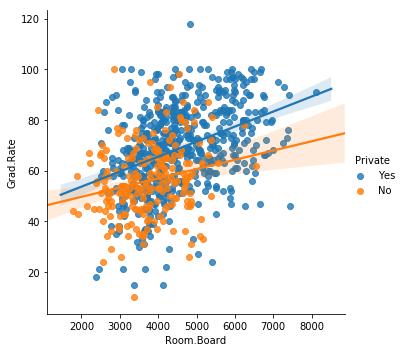

In [4]:
# dara visulazition
sns.lmplot(x='Room.Board',y="Grad.Rate",data=data,hue='Private')
plt.show()


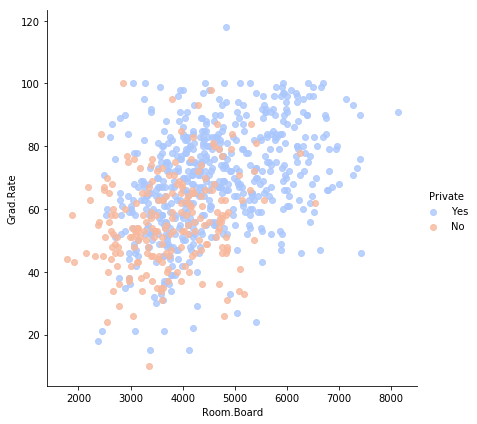

In [5]:
sns.lmplot(x='Room.Board',y="Grad.Rate",data=data,hue='Private',fit_reg=False,palette='coolwarm',height=6,aspect=1)
plt.show()


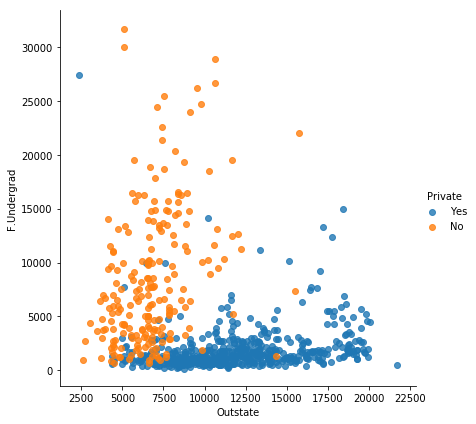

In [6]:
sns.lmplot(x='Outstate',y="F.Undergrad",data=data,hue='Private',fit_reg=False,height=6,aspect=1)
plt.show()

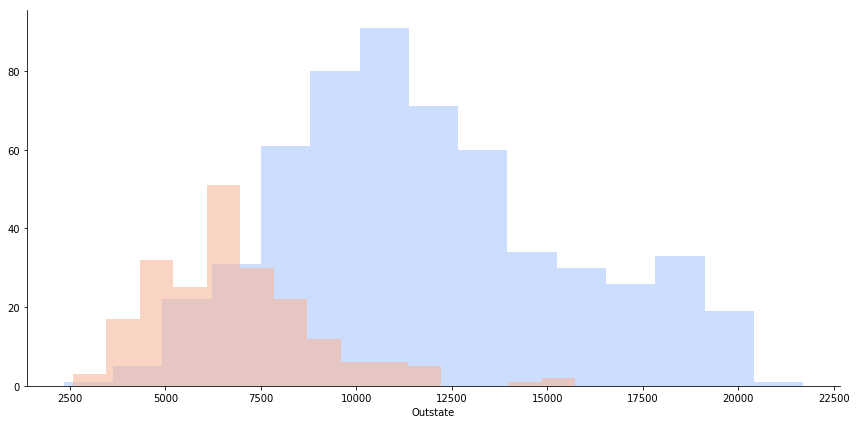

In [7]:
g=sns.FacetGrid(data,hue='Private',palette='coolwarm',height=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=15,alpha=0.6)
plt.show()

In [9]:
graderate=data[data['Grad.Rate']>100]
print(graderate)


                  Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Cazenovia College     Yes  3847    3433     527          9         35   

                   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
Cazenovia College         1010           12      9384        4840    600   

                   Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  \
Cazenovia College       500   22        47       14.3           20    7697   

                   Grad.Rate  
Cazenovia College        118  


In [14]:
# k mean cluster creation
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
fit=kmean.fit(data.drop('Private',axis=1))
print(fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [11]:
kmeancluster=kmean.cluster_centers_
print(kmeancluster)

# predicated label values
print(kmean.labels_)
print(kmean.inertia_)
print(kmean.n_iter_)

[[3.79185271e+03 2.04663566e+03 6.53937984e+02 4.98372093e+01
  7.72248062e+01 2.57355039e+03 2.35829457e+02 1.69343256e+04
  5.43727907e+03 5.74604651e+02 1.03575194e+03 8.75193798e+01
  9.33333333e+01 1.02046512e+01 3.51627907e+01 1.78138140e+04
  8.02868217e+01]
 [1.06216145e+04 7.30063855e+03 2.93942169e+03 3.20000000e+01
  6.34698795e+01 1.54825060e+04 3.17455422e+03 8.23585542e+03
  4.13487952e+03 5.94349398e+02 1.88833735e+03 8.41566265e+01
  8.95542169e+01 1.64072289e+01 1.58072289e+01 9.44095181e+03
  6.05060241e+01]
 [1.70182301e+03 1.23653451e+03 4.91520354e+02 2.18194690e+01
  4.97769912e+01 2.22618053e+03 6.56030088e+02 9.28193982e+03
  4.14370619e+03 5.37015929e+02 1.32979646e+03 6.75787611e+01
  7.51433628e+01 1.46362832e+01 2.09274336e+01 7.83074690e+03
  6.28070796e+01]]
[2 2 2 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 0
 0 2 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 2 0 2 2 2 2 1 0 0 0 2
 2 2 2 2 1 1 2 2 2 2 2 2 0 0 2 2 2 0 2 2 0 2 2 2 2 

In [15]:
# Eveluation

def converter(cluster) :
    if cluster == 'Yes':
        return 1
    else:
        return 0
data['cluster']=data['Private'].apply(converter)
print(data['cluster'])

Abilene Christian University               1
Adelphi University                         1
Adrian College                             1
Agnes Scott College                        1
Alaska Pacific University                  1
Albertson College                          1
Albertus Magnus College                    1
Albion College                             1
Albright College                           1
Alderson-Broaddus College                  1
Alfred University                          1
Allegheny College                          1
Allentown Coll. of St. Francis de Sales    1
Alma College                               1
Alverno College                            1
American International College             1
Amherst College                            1
Anderson University                        1
Andrews University                         1
Angelo State University                    0
Antioch University                         1
Appalachian State University               0
Aquinas Co

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['cluster'],kmean.labels_))
print(classification_report(data['cluster'],kmean.labels_))


[[  1  76 135]
 [128   7 430]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.01      0.00      0.01       212
           1       0.08      0.01      0.02       565
           2       0.00      0.00      0.00         0

   micro avg       0.01      0.01      0.01       777
   macro avg       0.03      0.01      0.01       777
weighted avg       0.06      0.01      0.02       777



C:\Users\venky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
